<a href="https://colab.research.google.com/github/themysterysolver/ML-Learn/blob/main/ITML/CHAPTER2_SL2_SUPERVISED_LEARNING_ALGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.2 MB/s eta 0:00:00


## k-Nearest Neighbors
- When considering more than one neighbor, we use ***voting*** to assign a
 label.
  - for a binary classification problem, but this method can be
 applied to datasets with any number of classes.
 - For more classes, we count how many
 neighbors belong to each class and again predict the most common class.

In [3]:
from sklearn.model_selection import train_test_split
import mglearn

In [6]:
X,y=mglearn.datasets.make_forge()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [9]:
clf.score(X_test,y_test)

0.8571428571428571

- Considering more and more neigh
bors leads to a smoother decision boundary. A smoother boundary corresponds to a
 simpler model.

###Breast cancer-KNearestNeighbors

In [17]:
from sklearn.datasets import load_breast_cancer

- If we don’t use `stratify`, the split might be imbalanced, leading to biased training (e.g., more benign samples than malignant).
This is especially important when dealing with imbalanced datasets.
- **fewer neighbors** corresponds to a more complex model
- But when **more neigh
bors** are considered, the model becomes simpler and the training accuracy drops.

In [24]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [30]:
trainAccuracy=[]
testAccuracy=[]

In [27]:
import matplotlib.pyplot as plt

In [25]:
print(len(X_train),len(y_train))

426 426


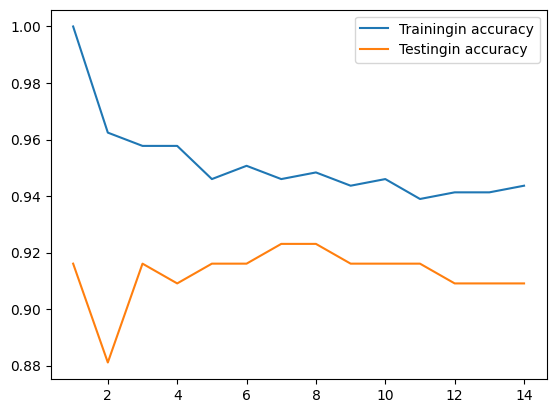

In [31]:
for i in range(1,15):
  clf=KNeighborsClassifier(i)
  clf.fit(X_train,y_train)
  trainAccuracy.append(clf.score(X_train,y_train))
  testAccuracy.append(clf.score(X_test,y_test))
plt.plot(range(1,15),trainAccuracy,label="Trainingin accuracy")
plt.plot(range(1,15),testAccuracy,label="Testingin accuracy")
plt.legend()

###K-neighbor regression
-There is also a ***regression variant*** of the k-nearest neighbors algorithm.
- we can use more than the single closest neighbor for regression. When using
 multiple nearest neighbors, the prediction is the *average, or mean, of the relevant*
 neighbors
 - $R^2$: The R2 score, also known as the ****coefficient of determination***, is a meas
ure of goodness of a prediction for a regression model, and yields a score between `0
 and 1` .
  - A value of 1 corresponds to a perfect prediction,
  - and a value of 0 corresponds
 to a constant model that just predicts the mean of the training set responses, y_train

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
X,y=mglearn.datasets.make_wave(40)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

[0.3519867415115093, 0.6557491875542132, 0.8344172446249605, 0.7704189018456431, 0.707138114401173, 0.6963552119009186, 0.6752134587675717, 0.6788241385739406, 0.6541236379533191, 0.6381920637966467, 0.6989374099426371, 0.6853827358907443, 0.6911059364120702, 0.6838927115096367]


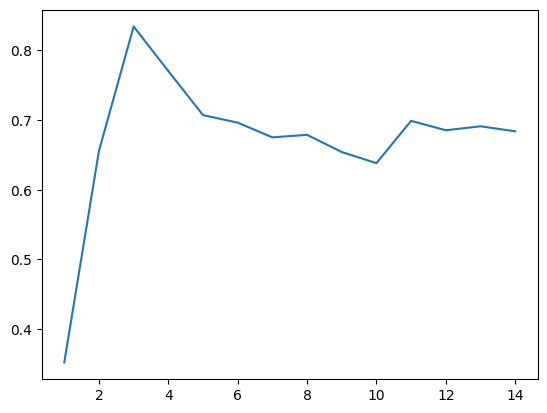

In [42]:
testA=[]
for i in range(1,15):
  clf=KNeighborsRegressor(i)
  clf.fit(X_train,y_train)
  testA.append(clf.score(X_test,y_test))
plt.plot(range(1,15),testA)
print(testA)

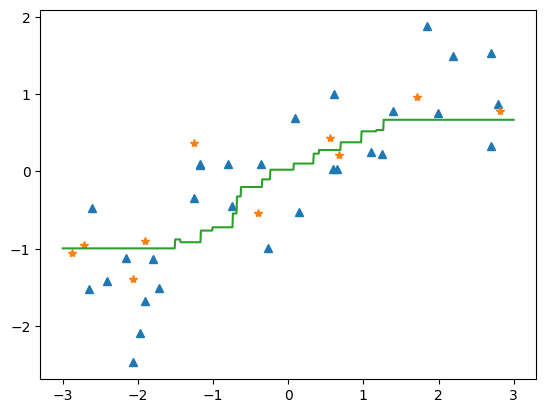

In [41]:
import numpy as np
plt.plot(X_train,y_train,'^')
plt.plot(X_test,y_test,'*')
line=np.linspace(-3,3,1000).reshape(-1,1)
plt.plot(line,clf.predict(line))

###Strengths, weaknesses, and parameters
- By default, Euclidean distance is used, which works
 well in many settings
 - Building
 the nearest neighbors model is usually very fast,
  - But when your training set is very
 large (either in number of features or in number of samples) prediction can be slow.
 When using the k-NN algorithm, it’s important to preprocess your data (see Chap
ter 3). This approach often does not perform well on datasets with many features
 (hundreds or more),
  -  And it does particularly badly with datasets where most features
 are 0 most of the time (so-called sparse datasets).